# <font color=blue> Sleep Health and Lifestyle Dataset

<img src=https://www.thensf.org/wp-content/uploads/2024/04/NSF-Sleep-Quality-Icon_01.png width=250>

### Introduction

The Sleep Health and Lifestyle Dataset is a dataset consisting of 374 rows and 13 columns. 

The dataset includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

This wide array of attributes allows for in-depth analysis of the complex relationships between sleep, health, and lifestyle factors.

### Contents
1. [Import Libraries](#import-libraries)
2. [Read Data](#read-data)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
   1. [Preliminary Examination](#preliminary-examination)
   2. [Handle Missing Value](#handle-missing-value)
   3. [Data Cleaning](#data-cleaning)
   4. [Summarizing Data](#summarizing-data)
   5. [Data Visualization](#data-visualization)
   6. [Correlation Analysis](#correlation-analysis)
4. [Feature Engineering & Modelling - Classification](#feature-engineering--modelling---classification)

### Import Libraries

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### Read Data

In [2]:
df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

### EDA - Exploratory Data Analysis

EDA is a crucial initial step in data science projects. It involves analyzing and visualizing data to understand its key characteristics, uncover patterns, and identify relationships between variables refers to the method of studying and exploring record sets to apprehend their predominant traits, discover patterns, locate outliers, and identify relationships between variables.

#### Preliminary Examination

In [3]:
df.head()   #first five rows

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.tail()   #last five rows 

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [5]:
df.shape

(374, 13)

In [6]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [8]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

#### Handle Missing Value

This is a common data cleaning technique used to handle missing data before performing further analysis or modeling.

In [9]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [10]:
df['Sleep Disorder']=df['Sleep Disorder'].fillna('None')
#I filled any missing values in the 'Sleep Disorder' column of a pandas DataFrame with the string value 'None'.

In [11]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

#### Data Cleaning

In [12]:
df.drop('Person ID',axis=1,inplace=True)
#The first parameter, 'Person ID', represents the name of the column to be removed.
#The axis=1 parameter indicates that we are referring to columns.
#The inplace=True parameter is used to apply the modification to the existing DataFrame.

#### Summarizing Data

In [13]:
df.describe()
#It provides summary statistics for each numerical column in the DataFrame.

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


#### Data Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Seaborn and Matplotlib are both powerful Python libraries for data visualization, each with its own strengths and use cases.

Seaborn is particularly well-suited for quickly creating visually appealing and informative plots with minimal coding effort. Seaborn's built-in themes and color palettes ensure that the resulting visualizations are aesthetically pleasing and consistent, making it an excellent choice for exploratory data analysis and quick prototyping.

On the other hand, Matplotlib offers a more comprehensive and flexible set of tools for data visualization. It provides a lower-level, granular control over every aspect of a plot, from the axes and labels to the color, size, and style of the individual elements.

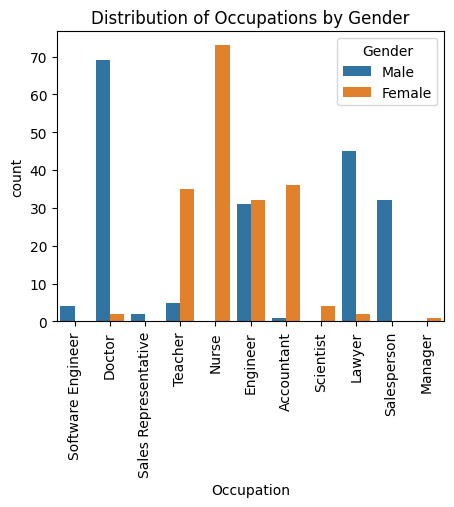

In [15]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df['Occupation'],hue=df.Gender)
plt.xticks(rotation=90)
plt.title('Distribution of Occupations by Gender')
plt.subplots_adjust(bottom=.3);

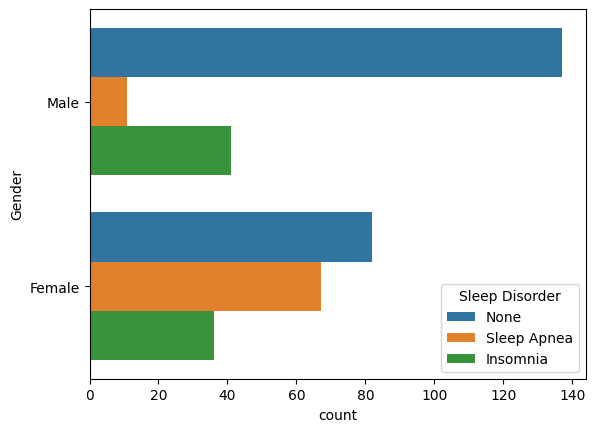

In [16]:
sns.countplot(y=df['Gender'],hue=df['Sleep Disorder']);

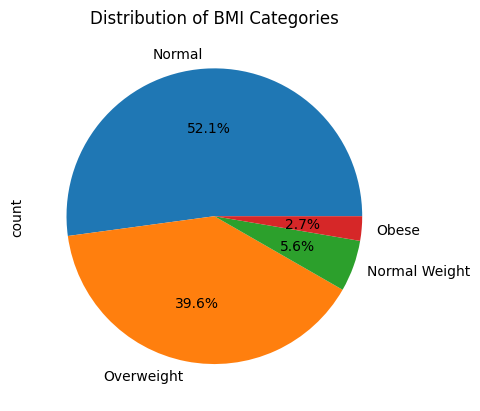

In [17]:
df['BMI Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of BMI Categories');

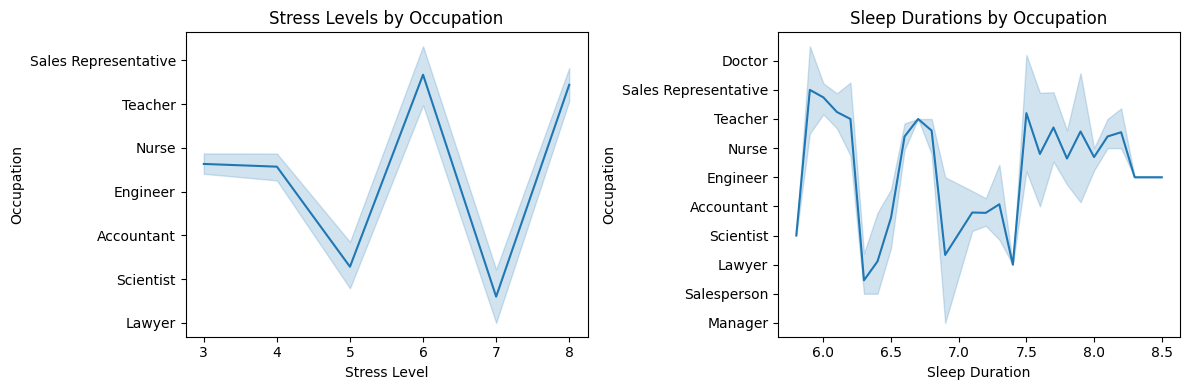

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ax=sns.lineplot(y=df['Occupation'], x=df['Stress Level'],ax=axes[0])
axes[0].set_title('Stress Levels by Occupation')

ax=sns.lineplot(y=df['Occupation'], x=df['Sleep Duration'],ax=axes[1])
axes[1].set_title('Sleep Durations by Occupation')
plt.tight_layout();

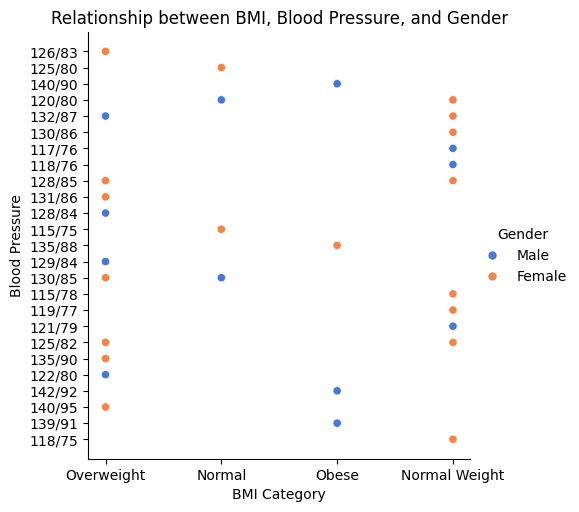

In [19]:
sns.relplot(x='BMI Category', y='Blood Pressure', hue='Gender', palette='muted', data=df)
plt.title('Relationship between BMI, Blood Pressure, and Gender');

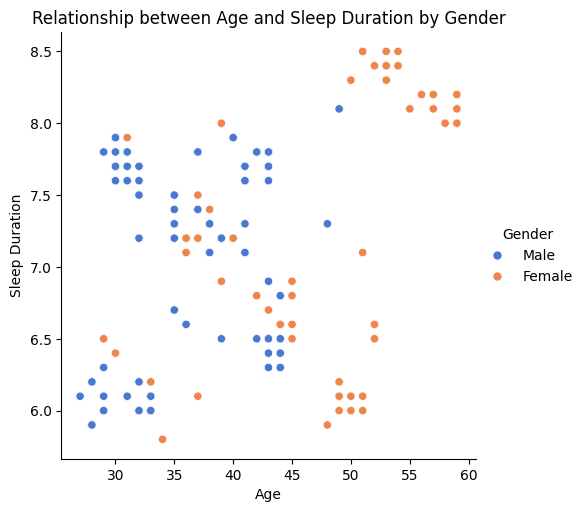

In [20]:
sns.relplot(x='Age', y='Sleep Duration', hue='Gender', palette='muted', data=df)
plt.title('Relationship between Age and Sleep Duration by Gender');

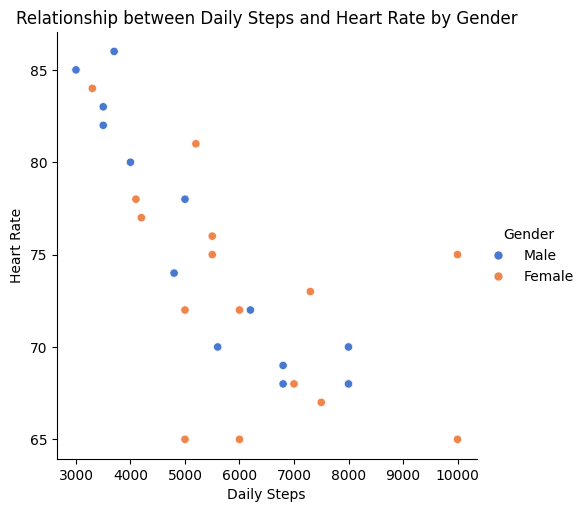

In [21]:
sns.relplot(x='Daily Steps', y='Heart Rate', hue='Gender', palette='muted', data=df)
plt.title('Relationship between Daily Steps and Heart Rate by Gender');

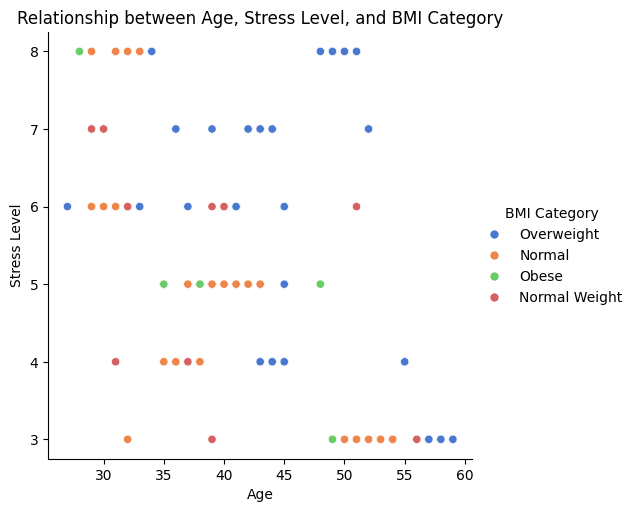

In [22]:
sns.relplot(x='Age', y='Stress Level', hue='BMI Category', palette='muted', data=df)
plt.title('Relationship between Age, Stress Level, and BMI Category');

#### Correlation Analysis

Correlation analysis can be useful for understanding the relationships between the different numeric variables in the dataset, which can inform feature selection, data transformation, and modeling decisions.

In [23]:
df.corr(numeric_only=True)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


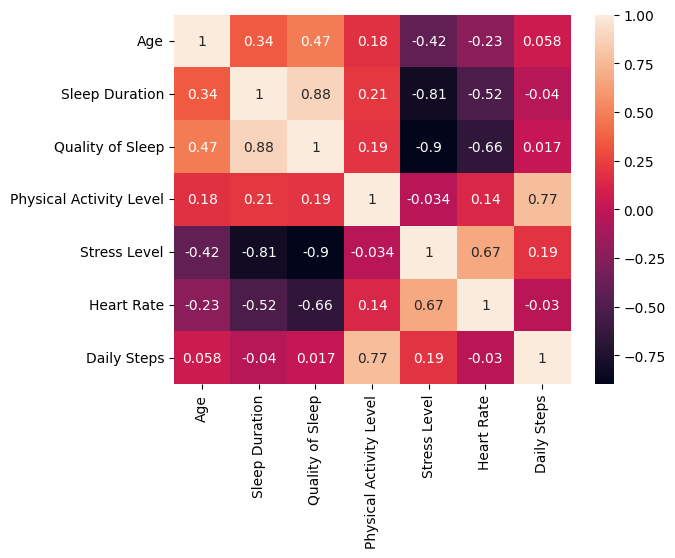

In [24]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

### Feature Engineering & Modelling - Classification

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
x=df.drop('Sleep Disorder',axis=1)
y=df[['Sleep Disorder']]

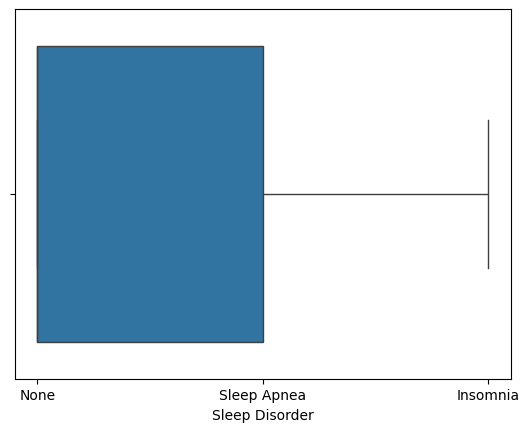

In [27]:
sns.boxplot(x=df['Sleep Disorder']);

In [28]:
x=pd.get_dummies(x,drop_first=True)
#The function pd.get_dummies() is applied to the DataFrame 'x' to convert categorical columns into binary variables. 
#The parameter drop_first=True is used to drop the first category for each categorical column, preventing the creation of redundant binary columns and avoiding the dummy variable trap (the issue of multicollinearity).

In [29]:
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [30]:
g=GaussianNB()
b=BernoulliNB()

In [31]:
g.fit(x,y)

GaussianNB()

In [32]:
gpredict=g.predict(x_test)

In [33]:
accuracy_score(gpredict,y_test)

0.92

In [34]:
confusion_matrix(gpredict,y_test)
#Confusion matrix is a table that summarizes the performance of a classification model.

array([[14,  2,  1],
       [ 1, 41,  1],
       [ 1,  0, 14]], dtype=int64)

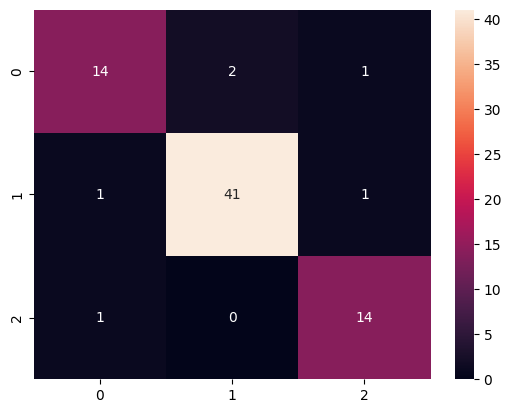

In [35]:
sns.heatmap(confusion_matrix(gpredict,y_test),annot=True);

In [36]:
print(classification_report(gpredict,y_test))

              precision    recall  f1-score   support

    Insomnia       0.88      0.82      0.85        17
        None       0.95      0.95      0.95        43
 Sleep Apnea       0.88      0.93      0.90        15

    accuracy                           0.92        75
   macro avg       0.90      0.90      0.90        75
weighted avg       0.92      0.92      0.92        75



In [37]:
b.fit(x_train,y_train)

BernoulliNB()

In [38]:
bpredict=b.predict(x_test)

In [39]:
accuracy_score(bpredict,y_test)

0.8533333333333334

In [40]:
confusion_matrix(bpredict,y_test)

array([[14,  3,  2],
       [ 1, 40,  4],
       [ 1,  0, 10]], dtype=int64)

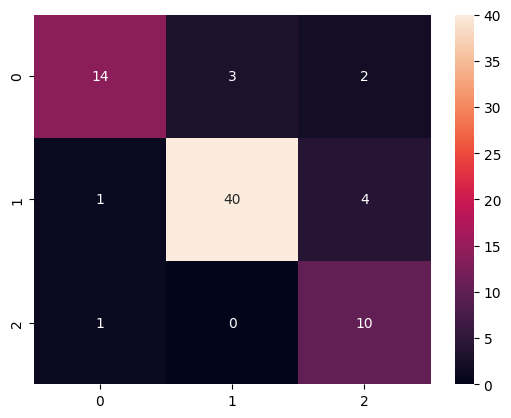

In [41]:
sns.heatmap(confusion_matrix(bpredict,y_test),annot=True);

In [42]:
print(classification_report(bpredict,y_test))

              precision    recall  f1-score   support

    Insomnia       0.88      0.74      0.80        19
        None       0.93      0.89      0.91        45
 Sleep Apnea       0.62      0.91      0.74        11

    accuracy                           0.85        75
   macro avg       0.81      0.84      0.82        75
weighted avg       0.87      0.85      0.86        75



The Gaussian model appears to outperform the Bernoulli model in terms of the key classification metrics. The higher accuracy, precision, recall, and F1-scores suggest that the Gaussian model is better at capturing the underlying patterns in the data and making more accurate predictions.